In [1]:
import os

import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG19

from keras.layers import Dense, GlobalAveragePooling2D, Dropout

from keras.models import Model

from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
# Set directory paths
data_dir = 'C:\Active-Projects\RHUL-FYP\PROJECT\skin-cancer-dataset\Resized_200x200_MIX_2Classes'

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
NUM_CLASSES = 2
EPOCHS = 800

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale the input in range (0, 1)
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2,
    rotation_range=360,
    vertical_flip=True,
    brightness_range=(0.7, 1.3),
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale the input in range (0, 1)
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2,
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset="training",
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset="validation",
)

Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [4]:
# Load pre-trained VGG16 and create a new custom model

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the original VGG16 model

for layer in base_model.layers[:-5]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator)

Epoch 1/800
25/25 [==============================] - 12s 280ms/step - loss: 0.7150 - accuracy: 0.4433 - val_loss: 0.7265 - val_accuracy: 0.4167
Epoch 2/800
25/25 [==============================] - 4s 172ms/step - loss: 0.7124 - accuracy: 0.4433 - val_loss: 0.7230 - val_accuracy: 0.4375
Epoch 3/800
25/25 [==============================] - 4s 173ms/step - loss: 0.7136 - accuracy: 0.4407 - val_loss: 0.7247 - val_accuracy: 0.4375
Epoch 4/800
25/25 [==============================] - 5s 187ms/step - loss: 0.7116 - accuracy: 0.4407 - val_loss: 0.7177 - val_accuracy: 0.4375
Epoch 5/800
25/25 [==============================] - 5s 185ms/step - loss: 0.7107 - accuracy: 0.4356 - val_loss: 0.7181 - val_accuracy: 0.4167
Epoch 6/800
25/25 [==============================] - 5s 184ms/step - loss: 0.7072 - accuracy: 0.4407 - val_loss: 0.7158 - val_accuracy: 0.3958
Epoch 7/800
25/25 [==============================] - 5s 182ms/step - loss: 0.7071 - accuracy: 0.4459 - val_loss: 0.7167 - val_accuracy: 0.385

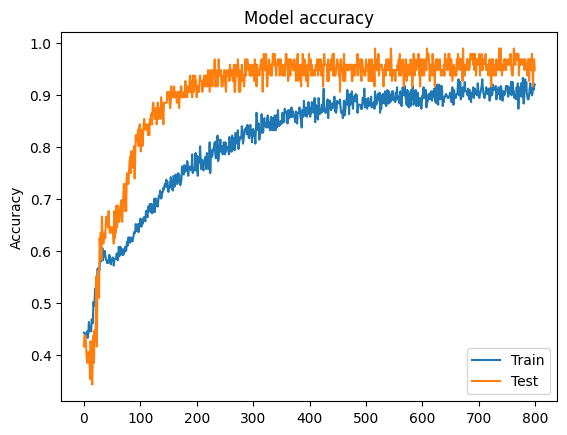

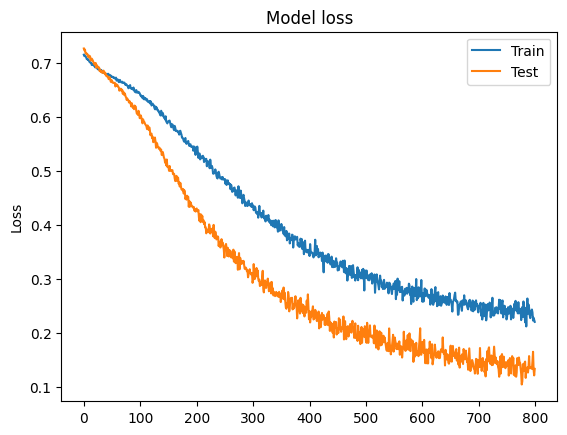

In [6]:
# Show the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [7]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/800
25/25 [==============================] - 11s 230ms/step - loss: 0.2289 - accuracy: 0.9124 - val_loss: 0.1423 - val_accuracy: 0.9688
Epoch 2/800
25/25 [==============================] - 6s 239ms/step - loss: 0.2311 - accuracy: 0.9175 - val_loss: 0.1407 - val_accuracy: 0.9375
Epoch 3/800
25/25 [==============================] - 7s 268ms/step - loss: 0.2377 - accuracy: 0.9046 - val_loss: 0.1226 - val_accuracy: 0.9583
Epoch 4/800
25/25 [==============================] - 7s 266ms/step - loss: 0.2289 - accuracy: 0.9175 - val_loss: 0.1514 - val_accuracy: 0.9479
Epoch 5/800
25/25 [==============================] - 6s 246ms/step - loss: 0.2036 - accuracy: 0.9253 - val_loss: 0.1231 - val_accuracy: 0.9792
Epoch 6/800
25/25 [==============================] - 7s 259ms/step - loss: 0.2288 - accuracy: 0.9227 - val_loss: 0.1381 - val_accuracy: 0.9479
Epoch 7/800
25/25 [==============================] - 7s 263ms/step - loss: 0.2217 - accuracy: 0.9175 - val_loss: 0.1074 - val_accuracy: 0.968

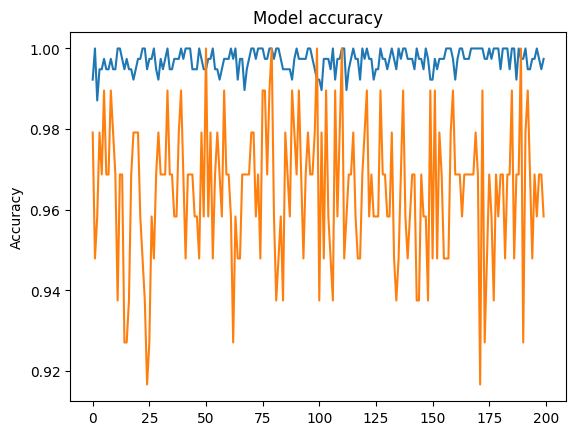

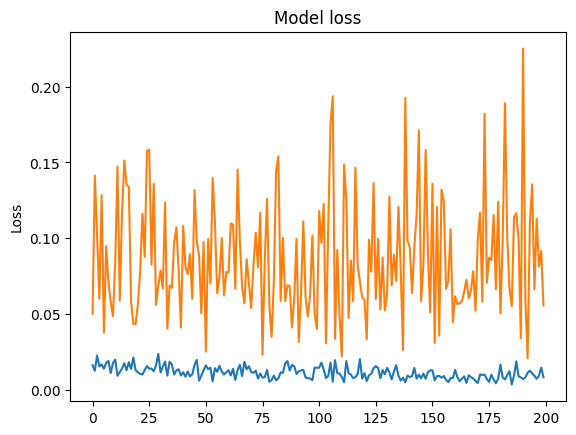

In [ ]:
plt.plot(fine_tune_history.history['accuracy'])
plt.plot(fine_tune_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()

# Plot the loss
plt.plot(fine_tune_history.history['loss'])
plt.plot(fine_tune_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


In [ ]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)